In [ ]:
!pip install fbprophet
conda install -c conda-forge pystan
conda install -c conda-forge fbprophet

In [6]:
import pandas as pd
import numpy as np
from fbprophet import Prophet


In [213]:
data = pd.read_csv('../data/jobsFinal.csv')
data.head()
df = data.loc[:,["date"]]
#df.loc[len(df),"date"] = "2018-04-10"

In [214]:
#df.loc[df.date == "2018-01-19",:]
#df.head()

In [96]:
#df.loc[df.date == "2018-01-19", :]


In [215]:
df = pd.DataFrame(df["date"].value_counts())
#df.loc[["2018-01-19"]]

In [216]:
df_2 = pd.DataFrame({'ds': df.index, 'y':df.loc[:,"date"]})
df_2 = df_2.sort_values("ds")

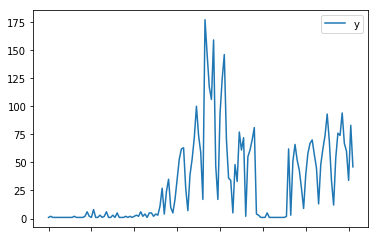

In [217]:
df_2.plot()

In [224]:
#df_2.copy(df_norm)
df_norm = df_2

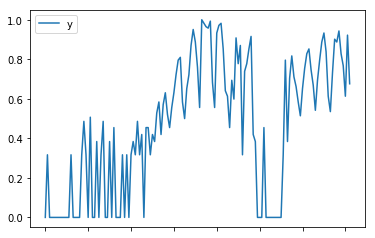

In [225]:
from sklearn import preprocessing
min_max_scaler = preprocessing.QuantileTransformer()
#X_train_minmax = min_max_scaler.fit_transform(X_train)

df_norm['y'] =  min_max_scaler.fit_transform(df_2.loc[:, ['y']])
df_norm.plot()

In [226]:
m = Prophet()
m.fit(df_norm)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [227]:
future = m.make_future_dataframe(periods=30)
#future.tail()

In [228]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [229]:
len(forecast)

173

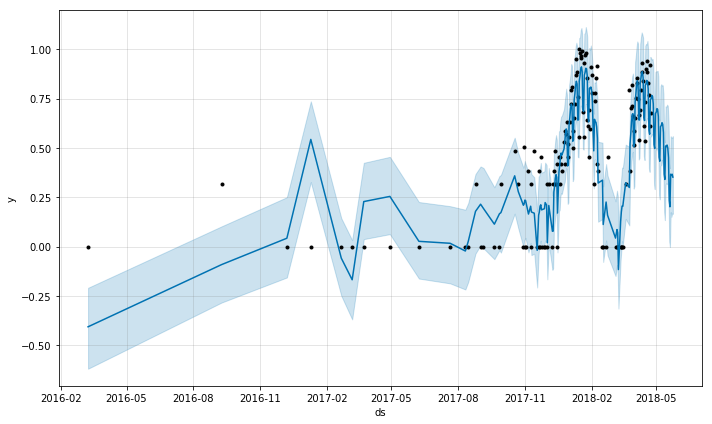

In [230]:
m.plot(forecast);